# 2. Examine each attribute in the group dataset. What is its datatype?

Timestamp<b> Continuous</b><br>
What is your main study profile?<b> Nominal</b><br>
What aspect of Data Visualization is most interesting to you?<b> Nominal</b><br>
How much effort do you intend to invest into this subject?<b> Discrete</b><br>
Your age (in years)<b> Continious</b><br>
Your height (in cm)<b> Continious</b><br>
Your starsign<b> Nominal</b><br>
Your continent<b> Nominal</b> <br>
How many cousins do you have?<b> Discrete</b><br>
Do you like spicy food?<b> Ordinal</b><br>


# 3.	Reproducible Research 

Are older students larger?


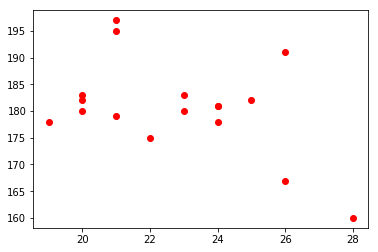

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

age = data['Your age (in years)']
length = data['Your height (in cm)']

plt.plot(age, length, 'ro')
plt.show()

Do Europeans have a smaller family?<br>
NOTE: If you look at this example it looks like EU has smaller families, BUT the other continents have only ONE person in the survey

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

stuff = data.groupby(['Your continent'])['How many cousins do you have?'].agg('mean')

stuff

Your continent
Asia             20.000000
Europe            8.285714
South-America    10.000000
Name: How many cousins do you have?, dtype: float64

Make a histogram for every quantitative attribute. What are these charts saying?

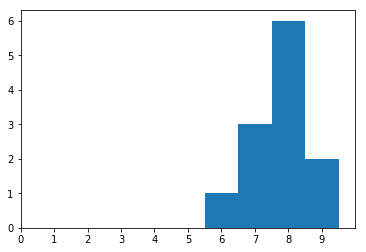

In [45]:
# Effort chart
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

stuff = data['How much effort do you intend to invest into this subject? ']

bins = np.arange(11) - 0.5

plt.hist(stuff, bins)
plt.xticks(range(10))
plt.xlim([0, 10])


plt.show()

# Alot of people are going for an 8 effort, no one is below 6

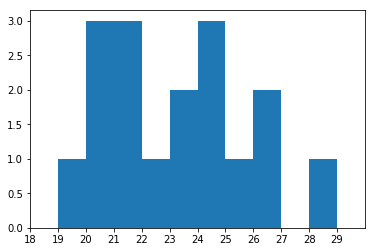

In [46]:
# Age chart
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")


stuff = data['Your age (in years)']

bins = np.arange(30) 

plt.hist(stuff, bins)
plt.xlim([18,30])
plt.xticks(range(18,30))


plt.show()

# Age is pretty evenly spread between 19 and 30

Is there any correlation between star sign and work energy?

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

stuff = data.groupby(['Your starsign'])['How much effort do you intend to invest into this subject? '].mean()

stuff = stuff.to_frame()

stuff

,How much effort do you intend to invest into this subject?
Your starsign,
Aquarius,8.0
Aries,10.0
Cancer,8.0
Gemini,9.0
Libra,10.0
Pisces,10.0
Sagittarius,8.0
Scorpio,7.5
Taurus,8.0


Do older people like spicier food? (Visualised it with pie charts to see how they would work in matplotlib)

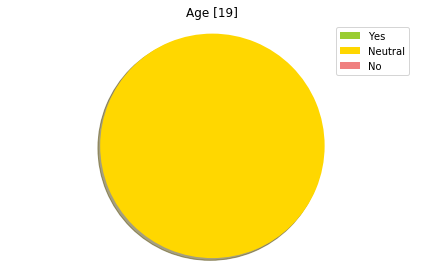

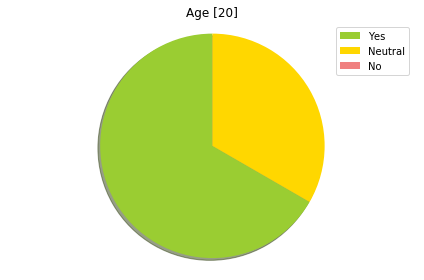

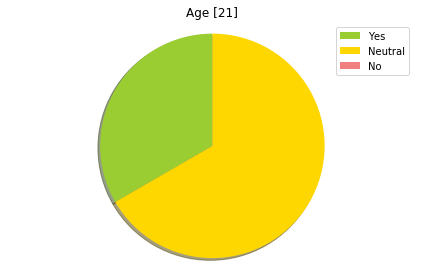

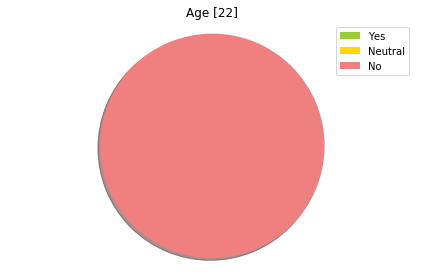

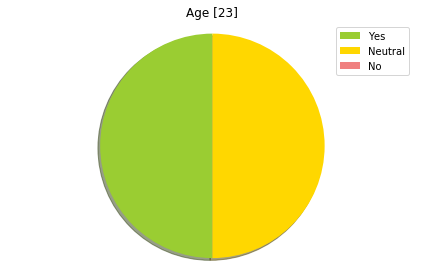

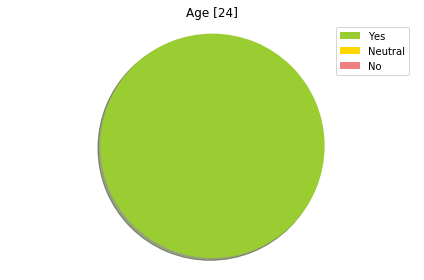

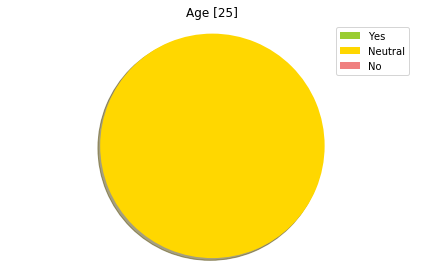

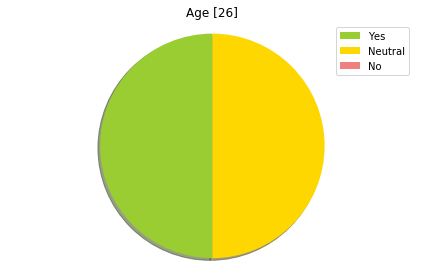

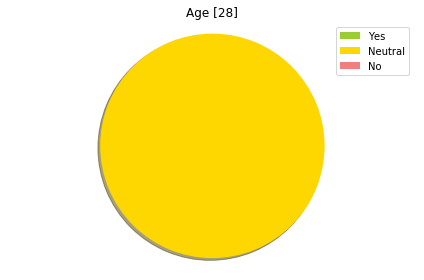

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def numbers_to_percentages(numbers):
    total = sum(numbers)
    return [numbers[0]/total * 100,numbers[1]/total * 100,numbers[2]/total * 100]

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

yes_to_spicy = data.loc[data['Do you like spicy food?'] == 'Yes']['Your age (in years)']
neutral_to_spicy = data.loc[data['Do you like spicy food?'] == 'neutral']['Your age (in years)']
no_to_spicy = data.loc[data['Do you like spicy food?'] == 'No']['Your age (in years)']

agepreference = []

ages = np.arange(17, 30)

for age in ages:
    yes = yes_to_spicy.loc[yes_to_spicy == age].count()
    neutral = neutral_to_spicy[neutral_to_spicy == age].count()
    no = no_to_spicy[no_to_spicy == age].count()
    
    if not(yes == 0 and no == 0 and neutral == 0):
        percentage = numbers_to_percentages([yes, neutral, no])
        agepreference.append(([age]+percentage))

labels = ['Yes', 'Neutral', 'No']
colors = ['yellowgreen', 'gold', 'lightcoral']

for age in agepreference:    
    patches, texts = plt.pie(age[1:4], colors=colors, shadow=True, startangle=90)
    
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.title('Age '+ str(age[:1]))
    plt.tight_layout()
    plt.show()
    

# Scatter matrix

I copied the original survey and shortend the names of the questions. This way they fit nicely in the matrix.</br>
The one plot I find the most informative is the one age-height. Here you can really see that most of the people are around 180cm regardless of their age.</br>
When playing with this matrix I also found out that if you don't set the diagonal to 'kde' it changes the diagonal lines to bars. This way it was more clear too see how many people were being represented but I think lines are better when you have alot of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F65CD90B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F65D38B518>]], dtype=object)

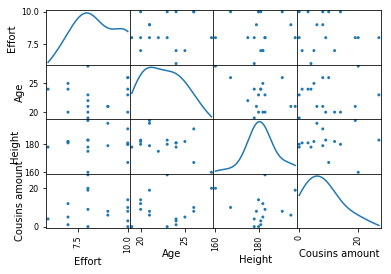

In [68]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

data = pd.read_csv("../repo/Week 2/DV01-GroupSurveyNamesChanged.csv")

scatter_matrix(data, alpha=1,  diagonal='kde')


# More complex charts

I played around with most of the charts on http://app.rawgraphs.io/ I added some images below of the ones I found the most interesting

![BoxPlot](https://raw.githubusercontent.com/ubaer/ADS-DV/master/Week%202/screenshots/boxplotAgeEffort.png)</br>
Boxplot

![CircleDendrogram](https://raw.githubusercontent.com/ubaer/ADS-DV/master/Week%202/screenshots/CircleDendrogram.png)</br>
Circle Dendrogram

![ClusterDendrogram](https://raw.githubusercontent.com/ubaer/ADS-DV/master/Week%202/screenshots/ClusterDendrogram.png)</br>
Cluster Dendrogram</br>
What I like the most about the dendograms is that you are not bound by only using numbers and set values to create the graph but you can basicly use any information that you like.